In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# show all columns
pd.set_option('display.max_columns', None)

In [2]:
import utils

# Import 2001 Data

In [3]:
variable_values_2001_df = pd.read_excel('raw_data/DS101 FC2001v5/Data/Metadata & Text Files/FC Variable Values.xlsx') # Used for mapping
variables_2001_df = pd.read_excel('raw_data/DS101 FC2001v5/Data/Metadata & Text Files/FC Variables.xlsx') # Explains what the variables are

df_2001 = pd.read_sas('raw_data/DS101 FC2001v5/Data/SAS files/fc01v5f.sas7bdat') # Main data file

In [231]:
var_name = 'EVERADPT'
variables_2001_df[variables_2001_df['VarName'] == var_name]

,VarName,VarLabel,Start,Length,Columns,Type
22,EVERADPT,Child Ever Adopted,47,1,47,INTEGER1


In [232]:
variable_values_2001_df[variable_values_2001_df['VarName'] == var_name]

,VarName,Value,ValueLabel
71,EVERADPT,0,Not applicable
72,EVERADPT,1,"Yes, child has been legally adopted"
73,EVERADPT,2,"No, has never been legally adopted"
74,EVERADPT,3,Unable to determine


# Clean DF

In [218]:
readable_df = df_2001.reset_index(drop=True)
readable_df['DataYear'] = readable_df['DataYear'].astype(int)
readable_df['RecNumbr'] = readable_df['RecNumbr'].str.decode('latin1')

readable_df['State'] = readable_df['STATE'].map(utils.var_values(variable_values_2001_df, 'State'))

variable_values_2001_df['VarName'] = variable_values_2001_df['VarName'].replace({'FIPSCODE': 'FIPSCode'})
readable_df['FIPSCode'] = readable_df['FIPSCODE'].map(utils.var_values(variable_values_2001_df, 'FIPSCode'))

readable_df['Sex'] = readable_df['SEX'].map(utils.var_values(variable_values_2001_df, 'SEX'))

readable_df['AgeAdopt'] = readable_df['AGEADOPT'].map(utils.var_values(variable_values_2001_df, 'AGEADOPT')).fillna('Unknown') # TODO Look into this more, why are some blank and some 'unable to determine'

readable_df['removalManner'] = readable_df['MANREM'].map(utils.var_values(variable_values_2001_df, 'MANREM'))
readable_df['currentPlacementSetting'] = readable_df['CURPLSET'].map(utils.var_values(variable_values_2001_df, 'CURPLSET'))
readable_df['OutOfStatePlacement'] = readable_df['PLACEOUT'].map(utils.var_values(variable_values_2001_df, 'PLACEOUT'))
readable_df['caseGoal'] = readable_df['CASEGOAL'].map(utils.var_values(variable_values_2001_df, 'CASEGOAL'))
readable_df['caretakerFamilyStructure'] = readable_df['CTKFAMST'].map(utils.var_values(variable_values_2001_df, 'CTKFAMST'))
readable_df['fosterFamilyStructure'] = readable_df['FOSFAMST'].map(utils.var_values(variable_values_2001_df, 'FOSFAMST'))
readable_df['dischargeReason'] = readable_df['DISREASN'].map(utils.var_values(variable_values_2001_df, 'DISREASN'))
readable_df['raceEthnicity'] = readable_df['RaceEthn'].map(utils.var_values(variable_values_2001_df, 'RaceEthn'))
readable_df['everAdopted'] = readable_df['EVERADPT'].map(utils.var_values(variable_values_2001_df, 'EVERADPT'))

readable_df['firstCaretakerAge'] = readable_df['DataYear'] - readable_df['CTK1YR']
readable_df['secondCaretakerAge'] = readable_df['DataYear'] - readable_df['CTK2YR']

readable_df['firstFosterCaretakerAge'] = readable_df['DataYear'] - readable_df['FCCTK1YR']
readable_df['secondFosterCaretakerAge'] = readable_df['DataYear'] - readable_df['FCCTK2YR']

readable_df['DOB'] = pd.to_datetime(readable_df['DOB'], errors='coerce')
readable_df['age2021'] = pd.to_datetime('2021-12-31') - readable_df['DOB']
readable_df['age2021'] = readable_df['age2021'].dt.days // 365

# TODO orgaize the date columns: DOB, Rem1Dt, DLstFCDt, LatRemDt, CurSetDt, DoDFCDt, TPRMomDt, TPRDadDt, PedRevDt, RemTrnDt, DoDTrnDt

date_cols = ['DOB', 'Rem1Dt', 'DLstFCDt', 'LatRemDt', 'CurSetDt', 'DoDFCDt', 'TPRMomDt', 'TPRDadDt', 'PedRevDt', 'RemTrnDt', 'DoDTrnDt', 'TPRDate']

race_columns = ['AMIAKN', 'ASIAN', 'BLKAFRAM', 'HAWAIIPI', 'WHITE', 'UNTODETM', 'HISORGIN']
caretaker_race_columns = ['RF1AMAKN', 'RF1ASIAN', 'RF1BLKAA', 'RF1NHOPI', 'RF1WHITE', 'RF1UTOD', 'HOFCCTK1', 'RF2AMAKN', 'RF2ASIAN', 'RF2BLKAA', 'RF2NHOPI', 'RF2WHITE', 'RF2UTOD', 'HOFCCTK2']

readable_df.drop(columns=['Version', # all values are 5
                       'STATE', 'St', # Duplicitive of State column
                       'REPDATYR', # Not necessary - Reporting end year - all values are 2001
                        'REPDATMO', # Not necessary - Reporting end month - all values are either 9 or 3
                        'FIPSCODE', # Not necessary - FIPS code is in a separate column
                        'SEX', # In column 'Sex' with mapped values
                        'AGEADOPT', # In column 'AgeAdopt' with mapped values
                        'MANREM', # In column 'removalManner' with mapped values
                        'CURPLSET', # In column 'currentPlacementSetting' with mapped values
                        'PLACEOUT', # In column 'OutOfStatePlacement' with mapped values
                        'CASEGOAL', # In column 'caseGoal' with mapped values
                        'CTKFAMST', # In column 'caretakerFamilyStructure' with mapped values
                        'CTK1YR', # In column 'firstCaretakerAge' with age values
                        'CTK2YR', # In column 'secondCaretakerAge' with age values
                        'FOSFAMST', # In column 'fosterFamilyStructure' with mapped values
                        'FCCTK1YR', # In column 'firstFosterCaretakerAge' with age values
                        'FCCTK2YR', # In column 'secondFosterCaretakerAge' with age values
                        'DISREASN', # In column 'dischargeReason' with mapped values
                        'RaceEthn', # In column 'raceEthnicity' with mapped values
                        'EVERADPT', # In column 'everAdopted' with mapped values
                       ] 
                       + race_columns # These are in the 'raceEthnicity' column
                       + caretaker_race_columns # TODO See if we want to add these back in?
                       + date_cols # TODO See if we want to add these back in?
                       , inplace=True)

In [229]:
var_name = 'CLINDIS'
variables_2001_df[variables_2001_df['VarName'] == var_name]

,VarName,VarLabel,Start,Length,Columns,Type
16,CLINDIS,Diagnosed Disability,41,1,41,INTEGER1


In [220]:
caretaker_race_columns = ['RF1AMAKN', 'RF1ASIAN', 'RF1BLKAA', 'RF1NHOPI', 'RF1WHITE', 'RF1UTOD', 'HOFCCTK1', 'RF2AMAKN', 'RF2ASIAN', 'RF2BLKAA', 'RF2NHOPI', 'RF2WHITE', 'RF2UTOD', 'HOFCCTK2']

In [221]:
readable_df.head()

,DataYear,RecNumbr,CLINDIS,MR,VISHEAR,PHYDIS,DSMIII,OTHERMED,EVERADPT,TOTALREM,NUMPLEP,PHYABUSE,SEXABUSE,NEGLECT,AAPARENT,DAPARENT,AACHILD,DACHILD,CHILDIS,CHBEHPRB,PRTSDIED,PRTSJAIL,NOCOPE,ABANDMNT,RELINQSH,HOUSING,IVEFC,IVEAA,IVAAFDC,IVDCHSUP,XIXMEDCD,SSIOTHER,NOA,FCMntPay,LatRemLOS,SettingLOS,PreviousLOS,LifeLOS,AgeAtStart,AgeAtLatRem,AgeAtEnd,InAtStart,InAtEnd,Entered,Exited,Served,IsWaiting,IsTPR,AgedOut,State,FIPSCode,Sex,AgeAdopt,removalManner,currentPlacementSetting,OutOfStatePlacement,caseGoal,caretakerFamilyStructure,fosterFamilyStructure,dischargeReason,raceEthnicity,everAdopted,firstCaretakerAge,secondCaretakerAge,firstFosterCaretakerAge,secondFosterCaretakerAge,age2021
0,2001,000000001907,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6750.0,779.0,NaN,6750.0,17.0,0.0,18.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Alabama,Fewer than 1000 cases in the County,Male,Unknown,Voluntary,Institution,No,Long-term foster care,Unable to determine,Not applicable,Not applicable,"NH, Black","No, has never been legally adopted",38.0,38.0,NaN,NaN,38.0
1,2001,000000003214,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6918.0,3610.0,NaN,6918.0,18.0,0.0,19.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Alabama,Fewer than 1000 cases in the County,Male,Unknown,Court ordered,Institution,No,Long-term foster care,Unmarried couple,Not applicable,Not applicable,"NH, Black","No, has never been legally adopted",52.0,39.0,NaN,NaN,39.0
2,2001,000000004630,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,241.0,5287.0,5276.0,NaN,NaN,20.0,6.0,21.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Alabama,"Jefferson, AL",Female,13 years or older,Court ordered,Pre-adoptive home,No,Long-term foster care,Unmarried couple,Married couple,Not applicable,"NH, Black","Yes, child has been legally adopted",56.0,41.0,45.0,46.0,41.0
3,2001,000000005085,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,241.0,6727.0,3077.0,NaN,6727.0,18.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,Alabama,Fewer than 1000 cases in the County,Female,Unknown,Court ordered,"Foster home, relative",No,Long-term foster care,Unable to determine,Not applicable,Emancipation,"NH, Black","No, has never been legally adopted",40.0,40.0,NaN,NaN,40.0
4,2001,000000006860,3.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,241.0,1934.0,641.0,2019.0,3953.0,18.0,14.0,19.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Alabama,Fewer than 1000 cases in the County,Male,Unknown,Court ordered,"Foster home, non-relative",No,Long-term foster care,Unable to determine,Married couple,Not applicable,"NH, Black","No, has never been legally adopted",40.0,40.0,39.0,38.0,40.0


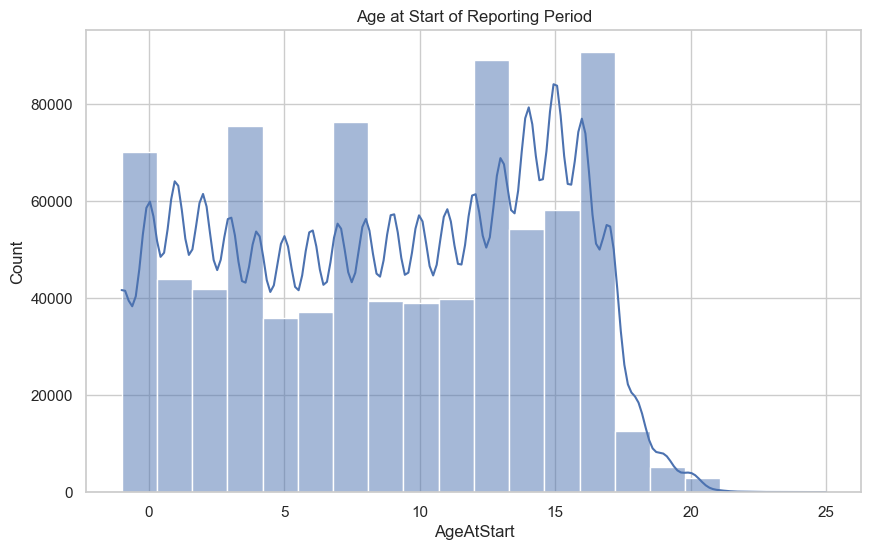

In [129]:
# plot the distribution of the ages
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(readable_df['AgeAtStart'].where(readable_df['AgeAtStart'] < 26 , np.nan), kde=True, bins=20)
plt.title('Age at Start of Reporting Period')
plt.show()

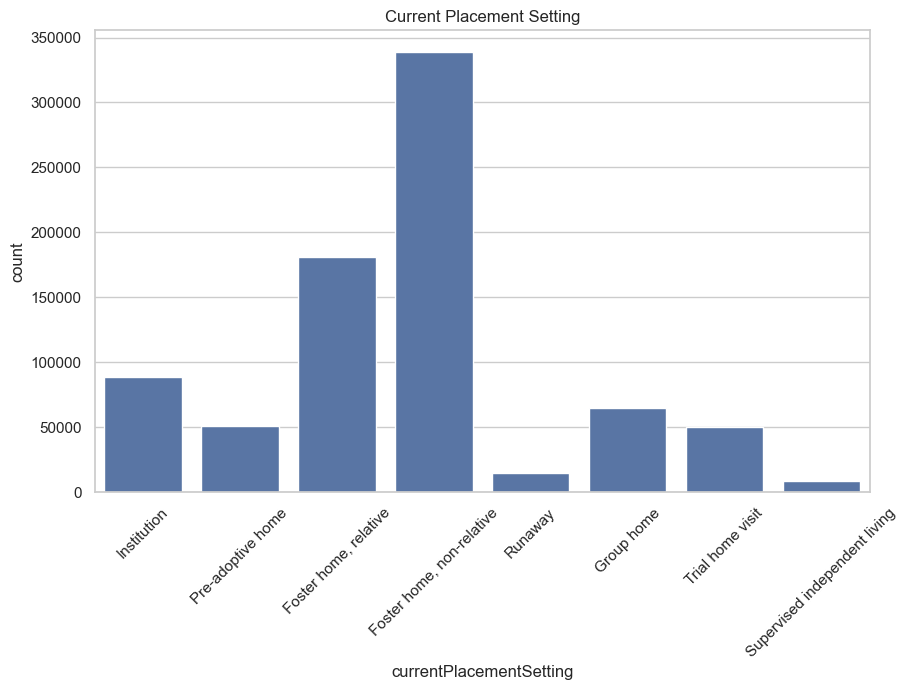

In [132]:
# plot the current placement setting
plt.figure(figsize=(10, 6))
sns.countplot(data=readable_df, x='currentPlacementSetting')
plt.title('Current Placement Setting')
plt.xticks(rotation=45)
plt.show()

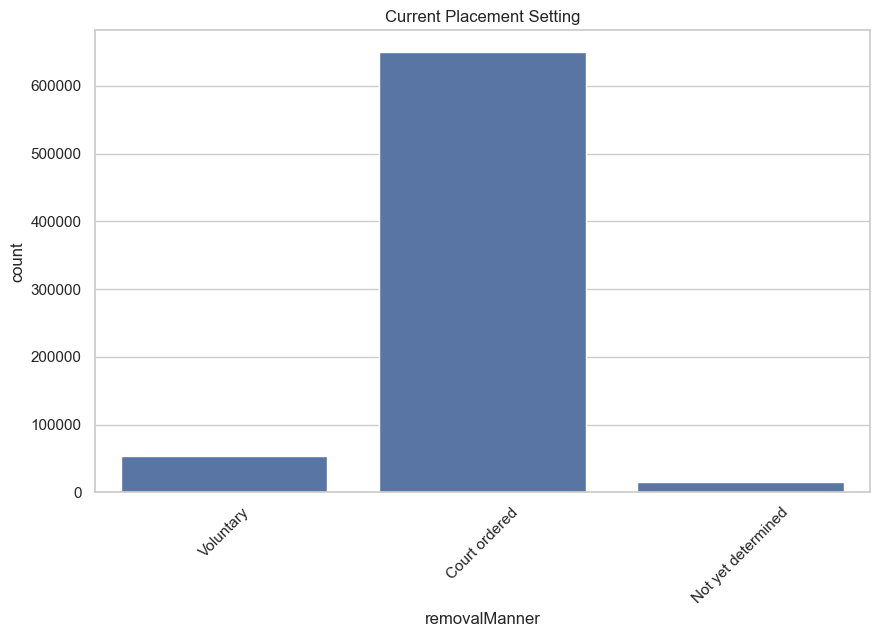

In [133]:
# plot the current placement setting
plt.figure(figsize=(10, 6))
sns.countplot(data=readable_df, x='removalManner')
plt.title('Removal Manner')
plt.xticks(rotation=45)
plt.show()

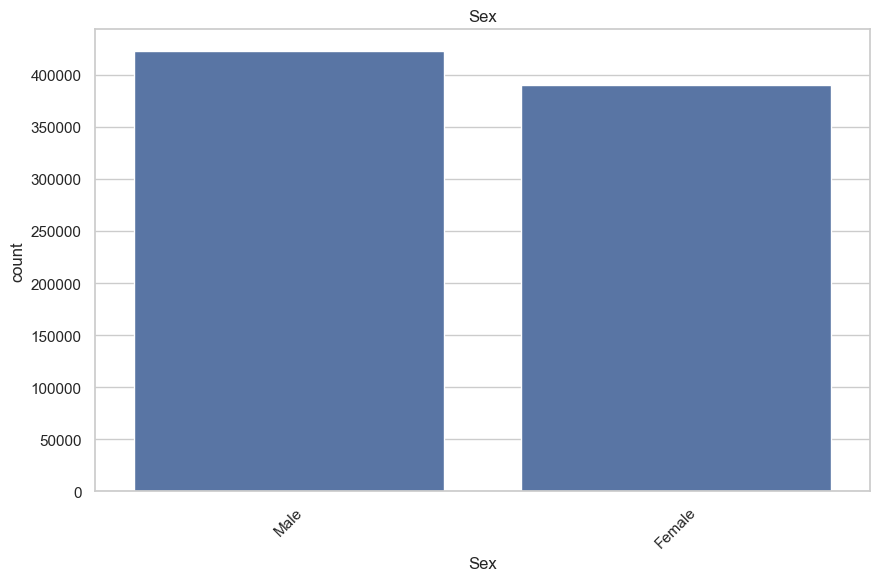

In [134]:
plt.figure(figsize=(10, 6))
sns.countplot(data=readable_df, x='Sex')
plt.title('Sex')
plt.xticks(rotation=45)
plt.show()

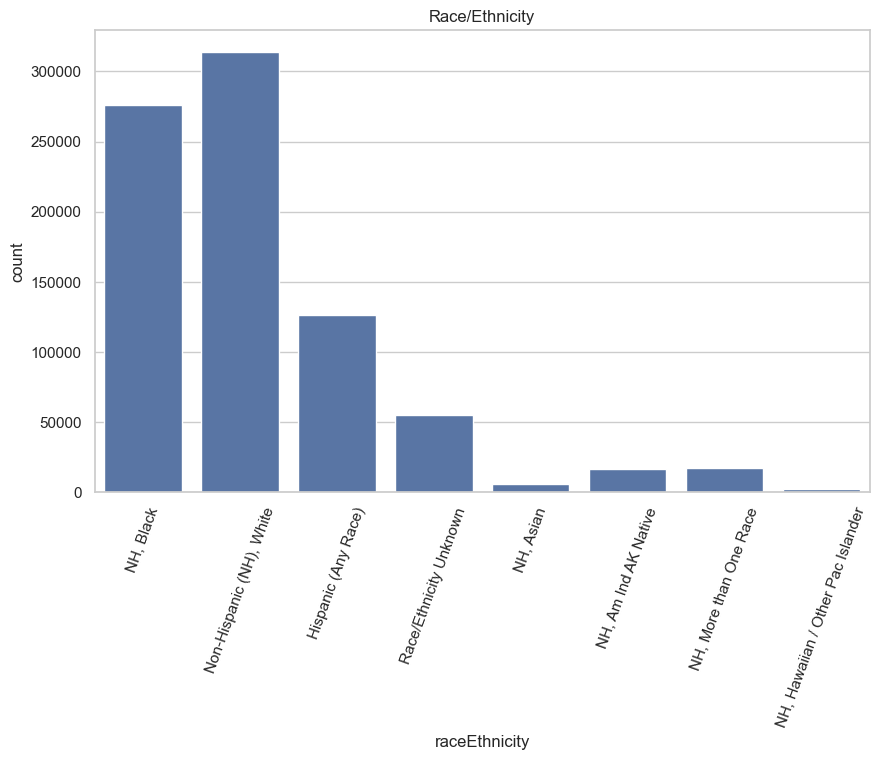

In [143]:
plt.figure(figsize=(10, 6))
sns.countplot(data=readable_df, x='raceEthnicity')
plt.title('Race/Ethnicity')
plt.xticks(rotation=70)
plt.show()

<Axes: xlabel='State'>

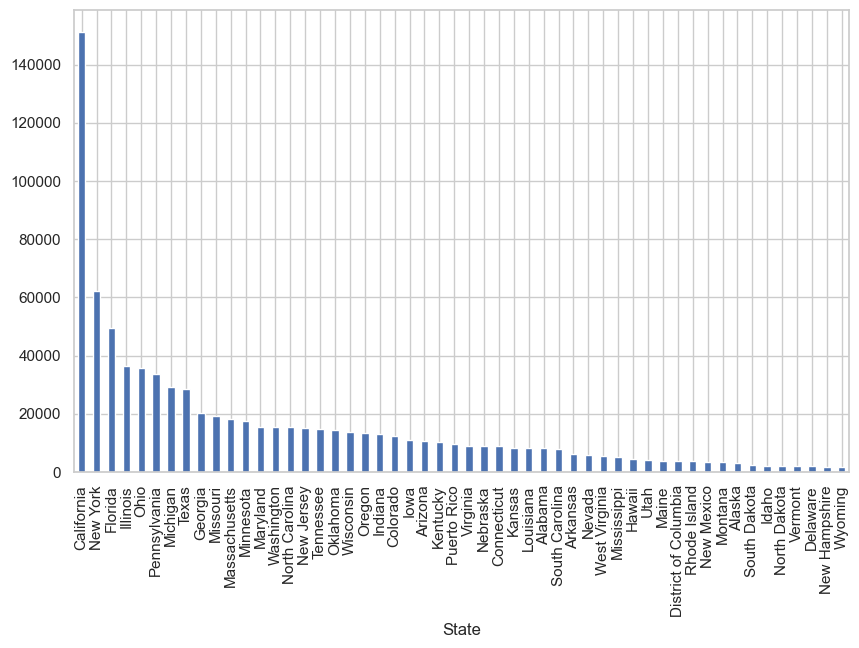

In [144]:
readable_df.groupby('State')['RecNumbr'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))

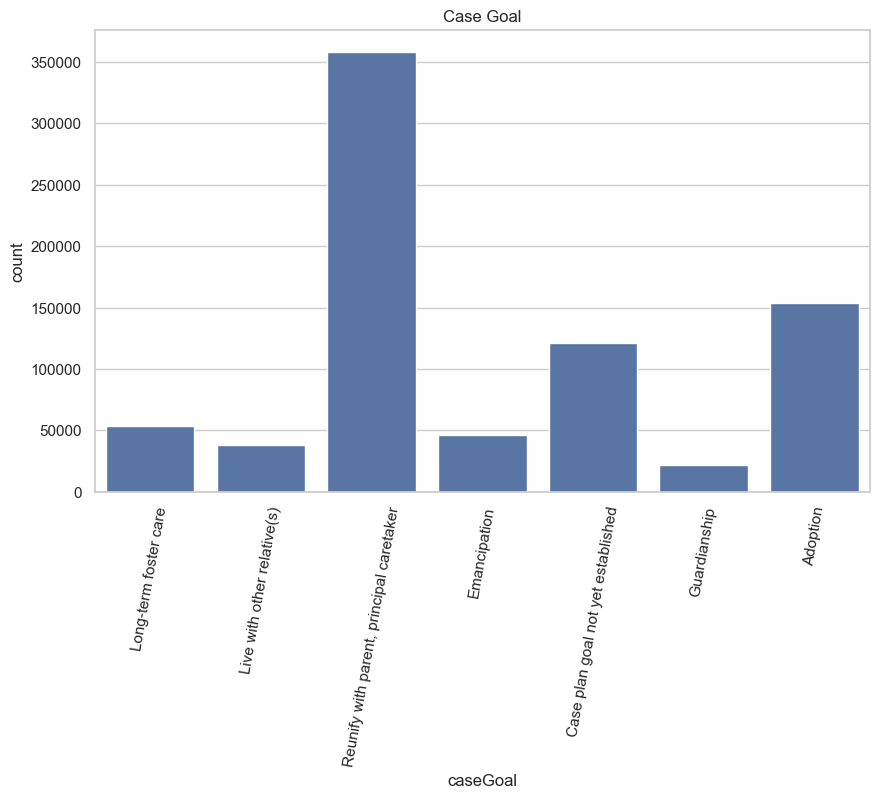

In [147]:
plt.figure(figsize=(10, 6))
sns.countplot(data=readable_df, x='caseGoal')
plt.title('Case Goal')
plt.xticks(rotation=80)
plt.show()

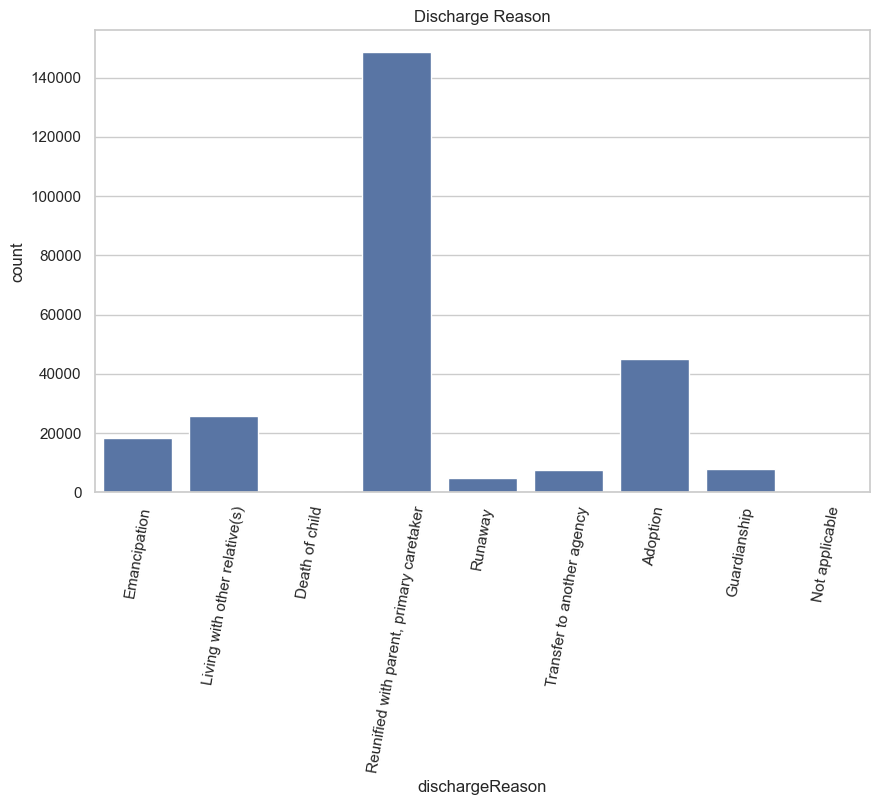

In [150]:
plt.figure(figsize=(10, 6))
sns.countplot(data=readable_df[readable_df['Exited'] == 1], x='dischargeReason')
plt.title('Discharge Reason')
plt.xticks(rotation=80)
plt.show()

In [226]:
included_subset = readable_df[(readable_df['Exited'] == 1) & (readable_df['age2021'] >= 18) & (readable_df['dischargeReason'] == readable_df['dischargeReason'])]

In [227]:
included_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258967 entries, 3 to 813260
Data columns (total 67 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DataYear                  258967 non-null  int64  
 1   RecNumbr                  258966 non-null  object 
 2   CLINDIS                   226416 non-null  float64
 3   MR                        239362 non-null  float64
 4   VISHEAR                   238689 non-null  float64
 5   PHYDIS                    239354 non-null  float64
 6   DSMIII                    239388 non-null  float64
 7   OTHERMED                  239363 non-null  float64
 8   EVERADPT                  229740 non-null  float64
 9   TOTALREM                  258210 non-null  float64
 10  NUMPLEP                   256363 non-null  float64
 11  PHYABUSE                  239055 non-null  float64
 12  SEXABUSE                  239051 non-null  float64
 13  NEGLECT                   239059 non-null  float6

In [228]:
included_subset.head()

,DataYear,RecNumbr,CLINDIS,MR,VISHEAR,PHYDIS,DSMIII,OTHERMED,EVERADPT,TOTALREM,NUMPLEP,PHYABUSE,SEXABUSE,NEGLECT,AAPARENT,DAPARENT,AACHILD,DACHILD,CHILDIS,CHBEHPRB,PRTSDIED,PRTSJAIL,NOCOPE,ABANDMNT,RELINQSH,HOUSING,IVEFC,IVEAA,IVAAFDC,IVDCHSUP,XIXMEDCD,SSIOTHER,NOA,FCMntPay,LatRemLOS,SettingLOS,PreviousLOS,LifeLOS,AgeAtStart,AgeAtLatRem,AgeAtEnd,InAtStart,InAtEnd,Entered,Exited,Served,IsWaiting,IsTPR,AgedOut,State,FIPSCode,Sex,AgeAdopt,removalManner,currentPlacementSetting,OutOfStatePlacement,caseGoal,caretakerFamilyStructure,fosterFamilyStructure,dischargeReason,raceEthnicity,everAdopted,firstCaretakerAge,secondCaretakerAge,firstFosterCaretakerAge,secondFosterCaretakerAge,age2021
3,2001,000000005085,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,241.0,6727.0,3077.0,NaN,6727.0,18.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,Alabama,Fewer than 1000 cases in the County,Female,Unknown,Court ordered,"Foster home, relative",No,Long-term foster care,Unable to determine,Not applicable,Emancipation,"NH, Black","No, has never been legally adopted",40.0,40.0,NaN,NaN,40.0
6,2001,000000007376,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,205.0,7054.0,5527.0,NaN,7054.0,18.0,0.0,19.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,Alabama,Fewer than 1000 cases in the County,Female,Unknown,Court ordered,"Foster home, non-relative",No,Long-term foster care,Married couple,Not applicable,Emancipation,"NH, Black","No, has never been legally adopted",66.0,39.0,69.0,NaN,39.0
7,2001,000000008421,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6788.0,2.0,NaN,6788.0,19.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,Alabama,Fewer than 1000 cases in the County,Male,Unknown,Court ordered,NaN,No,Long-term foster care,Single female,Not applicable,Emancipation,"NH, Black","No, has never been legally adopted",43.0,41.0,NaN,NaN,41.0
14,2001,000000009877,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,241.0,5500.0,658.0,511.0,6011.0,17.0,2.0,18.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Alabama,Fewer than 1000 cases in the County,Male,Unknown,Court ordered,"Foster home, non-relative",No,Long-term foster care,Unmarried couple,Not applicable,Living with other relative(s),"Non-Hispanic (NH), White","No, has never been legally adopted",42.0,38.0,59.0,NaN,38.0
15,2001,000000012543,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,241.0,6496.0,5999.0,398.0,6894.0,20.0,3.0,21.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,Alabama,Fewer than 1000 cases in the County,Male,Unknown,Court ordered,"Foster home, non-relative",No,Long-term foster care,Married couple,Married couple,Emancipation,"Non-Hispanic (NH), White","No, has never been legally adopted",57.0,41.0,70.0,NaN,41.0


# Defining Success in Foster Care

Intention: Predict the likelihood of a child successfully being reunified with their parent.

- dischargeReason = Reunified with parent, primary caretaker
- Does not enter the system a second time before the age of 18.

#### Entering the System Again
In order to successfully measure this we need to:
1. Calculate the age of each exited ['Exited' = 1] child relative to 2021 (the last year of reporting) and make sure it is at least 18.
2. Check to see if these children appear again in the data set after their exit date.
3. If child never appears again in the data set and their age is above 18 by 2021, they are considered to have successfully exited the system.

### Subquestions
- What is the likelihood of a child who has been reunified with their parent entering the system again?